# Entregable Etapa 5: Análisis preliminar de los datos


# Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Lectura de Datos

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df = pd.read_csv('/content/gdrive/Shareddrives/Reto Equipo 2/datos_tec.csv')

In [4]:
df.head()

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
1,02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
2,03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
3,04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
4,05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051


In [5]:
df.tail()

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
9387,13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
9388,14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061
9389,15/09/2020 0:00,100.0,352,3.52,15.6,17.6,0.031
9390,16/09/2020 0:00,100.0,399,3.52,17.0,22.8,0.059
9391,17/09/2020 0:00,101.0,413,2.03,18.8,18.7,0.058


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9392 entries, 0 to 9391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIME       9392 non-null   object 
 1   Dureza     9391 non-null   float64
 2   Tasa_Prod  9392 non-null   int64  
 3   Asp        9391 non-null   float64
 4   EC         9392 non-null   float64
 5   EE         9392 non-null   float64
 6   Calidad    9392 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 513.8+ KB


In [7]:
df.shape

(9392, 7)

### Valores ausentes

In [8]:
null=df[df.isnull().any(1)]
null

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
60,02/03/1995 0:00,NaN,402,2.93,26.7,15.8,0.093
62,04/03/1995 0:00,103.0,391,NaN,20.3,20.3,0.093


In [9]:
#Eliminar las filas con valores nulos
df=df.drop([60,62])

In [10]:
df['Tasa_Prod']=df['Tasa_Prod'].fillna(0)
df=df.drop(df[df['Tasa_Prod']==0].index)
df

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
1,02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
2,03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
3,04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
4,05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051
...,...,...,...,...,...,...,...
9387,13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
9388,14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061
9389,15/09/2020 0:00,100.0,352,3.52,15.6,17.6,0.031
9390,16/09/2020 0:00,100.0,399,3.52,17.0,22.8,0.059


### Atributos vs Tiempo

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['Dureza'])
plt.show()

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['Dureza'])\nplt.show()"

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['Tasa_Prod'])
plt.show()

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['Tasa_Prod'])\nplt.show()"

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['Asp'])
plt.show()

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['Asp'])\nplt.show()"

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['EC'])
plt.show()

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['EC'])\nplt.show()"

In [15]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['EE'])
plt.show()

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['EE'])\nplt.show()"

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(df['TIME'], df['Calidad'])
plt.show()

"fig, ax = plt.subplots(figsize=(15,8))\nax.scatter(df['TIME'], df['Calidad'])\nplt.show()"

# Detección de Outliers

In [17]:
df.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
count,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000,9322.000000
mean,104.033040,393.856147,3.152711,19.449507,19.140474,0.090004
std,2.052937,27.750413,0.371904,6.577180,7.991757,0.048889
min,80.000000,184.000000,0.350000,0.000000,0.000000,0.000000
25%,103.000000,384.000000,3.040000,16.000000,14.400000,0.061000
50%,104.000000,398.000000,3.260000,19.200000,20.100000,0.081000
75%,105.000000,409.000000,3.380000,23.500000,25.300000,0.107000
max,112.000000,480.000000,3.520000,40.400000,35.300000,1.000000


In [18]:
Q1_Prod = df['Tasa_Prod'].quantile(0.3)
Q3_Prod = df['Tasa_Prod'].quantile(0.7)
IQR_Prod = Q3_Prod - Q1_Prod

clf = df[~(df['Tasa_Prod'] < (Q1_Prod - 1.5 * IQR_Prod))]

Q1_Calidad = clf['Calidad'].quantile(0.3)
Q3_Calidad = clf['Calidad'].quantile(0.7)
IQR_Calidad = Q3_Calidad - Q1_Calidad

clf = clf[~(clf['Calidad'] < (Q1_Calidad - 0.75 * IQR_Calidad))]
clf

,TIME,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
0,01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
1,02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
2,03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
3,04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
4,05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051
...,...,...,...,...,...,...,...
9386,12/09/2020 0:00,103.0,409,3.52,23.0,9.1,0.103
9387,13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
9388,14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061
9390,16/09/2020 0:00,100.0,399,3.52,17.0,22.8,0.059


In [19]:
clf.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
count,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000
mean,104.106243,400.245377,3.204921,19.790791,19.555405,0.093814
std,2.057365,17.016625,0.285065,6.433309,7.746881,0.045528
min,80.000000,363.000000,1.110000,0.000000,0.000000,0.040000
25%,103.000000,389.000000,3.140000,16.400000,14.900000,0.066000
50%,104.000000,400.000000,3.270000,19.400000,20.300000,0.085000
75%,105.000000,410.000000,3.390000,23.800000,25.500000,0.109000
max,112.000000,480.000000,3.520000,40.400000,34.500000,0.887000


**Dureza**

{'boxes': [<matplotlib.lines.Line2D at 0x7f2af60d9c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2af60e7d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2af60edd50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2af60ed810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2af60d9dd0>,
  <matplotlib.lines.Line2D at 0x7f2af60e77d0>]}

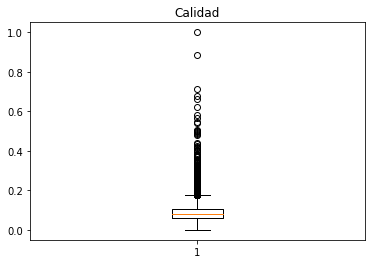

In [20]:
plt.title('Calidad')
plt.boxplot(df.Calidad) 

{'boxes': [<matplotlib.lines.Line2D at 0x7f2af5bbb750>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2af5bbf790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2af5bc57d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2af5bc5290>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2af5bbbcd0>,
  <matplotlib.lines.Line2D at 0x7f2af5bbf250>]}

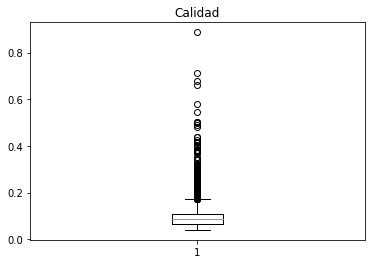

In [21]:
plt.title('Calidad')
plt.boxplot(clf.Calidad) 

**Tasa de Producción**

{'boxes': [<matplotlib.lines.Line2D at 0x7f2af5b27ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2af5b2ef10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2af5b33f90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2af5b33a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2af5b2e490>,
  <matplotlib.lines.Line2D at 0x7f2af5b2e9d0>]}

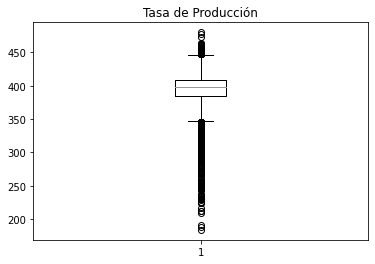

In [22]:
plt.title('Tasa de Producción')
plt.boxplot(df.Tasa_Prod)

{'boxes': [<matplotlib.lines.Line2D at 0x7f2af5b18ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2af5b20f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2af5aa8f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2af5aa8a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2af5b20490>,
  <matplotlib.lines.Line2D at 0x7f2af5b209d0>]}

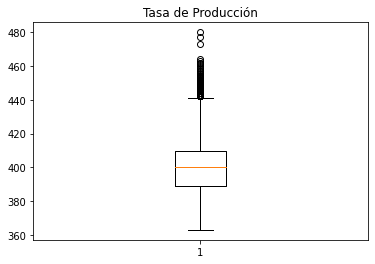

In [23]:
plt.title('Tasa de Producción')
plt.boxplot(clf.Tasa_Prod)

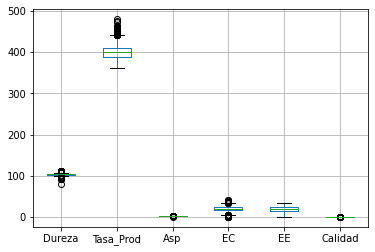

In [24]:
clf.boxplot(column=['Dureza', 'Tasa_Prod', 'Asp', 'EC', 'EE', 'Calidad'])

# Correlación

In [25]:
clf.set_index('TIME', inplace=True)   
clf   

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
TIME,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051
...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,0.103
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061


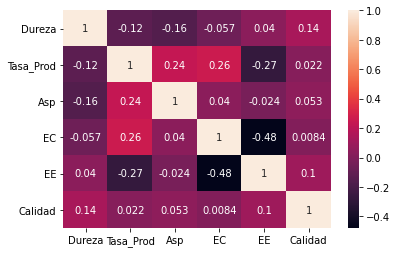

In [26]:
clf = clf.select_dtypes(include=['float64','int']) 
corr_matrix = clf.corr(method = 'pearson') 
sn.heatmap(corr_matrix, annot = True) 
plt.show() 

# Histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2aed02ea10>,
      dtype=object)

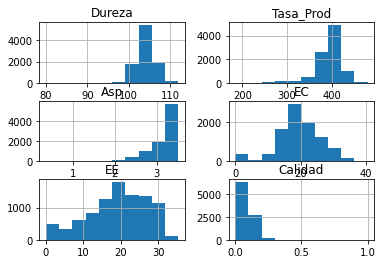

In [27]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2aece18690>,
      dtype=object)

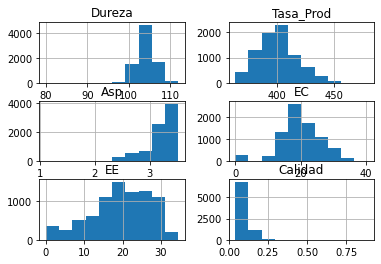

In [28]:
clf.hist()

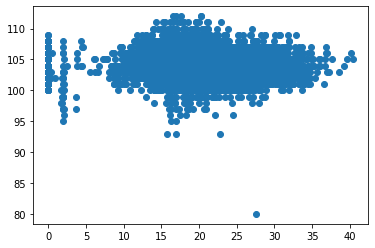

In [29]:
x = clf['EC'] 
y = clf['Dureza']
fig,ax = plt.subplots()
ax.scatter(x,y)

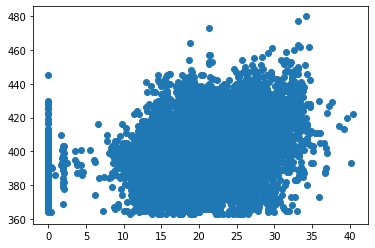

In [30]:
x = clf['EC']
y = clf['Tasa_Prod']
fig,ax = plt.subplots()
ax.scatter(x,y)

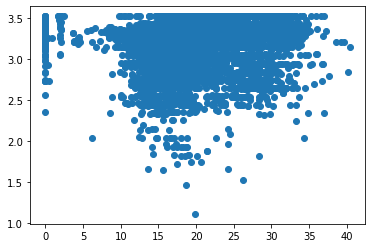

In [31]:
x = clf['EC']
y = clf['Asp']
fig,ax = plt.subplots()
ax.scatter(x,y)

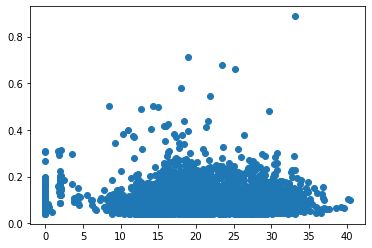

In [32]:
x = clf['EC']
y = clf['Calidad']
fig,ax = plt.subplots()
ax.scatter(x,y)

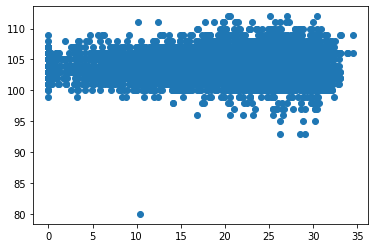

In [33]:
x = clf['EE']
y = clf['Dureza']
fig,ax = plt.subplots()
ax.scatter(x,y)

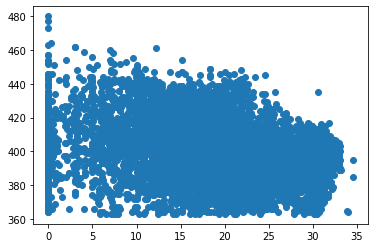

In [34]:
x = clf['EE']
y = clf['Tasa_Prod']
fig,ax = plt.subplots()
ax.scatter(x,y)

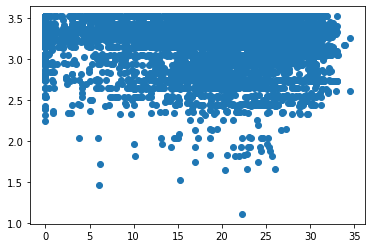

In [35]:
x = clf['EE']
y = clf['Asp']
fig,ax = plt.subplots()
ax.scatter(x,y)

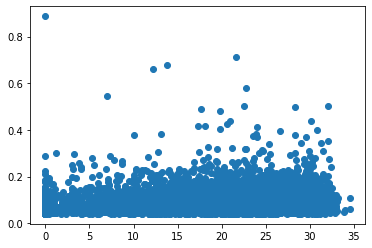

In [36]:
x = clf['EE']
y = clf['Calidad']
fig,ax = plt.subplots()
ax.scatter(x,y)

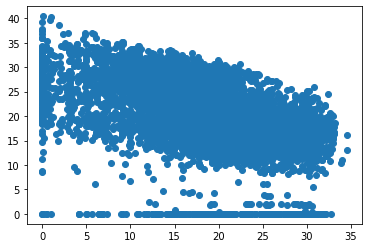

In [37]:
x = clf['EE']
y = clf['EC']
fig,ax = plt.subplots()
ax.scatter(x,y)

#Costo

In [38]:
clf

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad
TIME,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056
05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051
...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,0.103
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061


In [39]:
clf['Costo_Total'] = pd.Series(clf['EE'] + (.724 * clf['EC']))
clf['Costo_Ponderado'] = pd.Series(clf['Costo_Total'] / clf['Tasa_Prod']) 
clf['EE_Ponderado'] = pd.Series(clf['EE'] / clf['Tasa_Prod'])
clf['EC_Ponderado'] = pd.Series(clf['EC'] / clf['Tasa_Prod']) 
clf

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado
TIME,,,,,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,0.053,40.6324,0.110414,0.080707,0.041033
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,0.108,19.4756,0.045717,0.000000,0.063146
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,0.098,21.3580,0.047888,0.000000,0.066143
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,0.056,39.0836,0.098946,0.064304,0.047848
05/01/1995 0:00,102.0,380,3.00,17.5,26.6,0.051,39.2700,0.103342,0.070000,0.046053
...,...,...,...,...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,0.103,25.7520,0.062963,0.022249,0.056235
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,0.108,37.0356,0.089675,0.060048,0.040920
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,0.061,29.6108,0.072575,0.034069,0.053186


In [40]:
clf['Costo_Ponderado'].mean()

0.08489429080665893

In [41]:
clf.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado
count,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000
mean,104.106243,400.245377,3.204921,19.790791,19.555405,0.093814,33.883938,0.084894,0.049156,0.049362
std,2.057365,17.016625,0.285065,6.433309,7.746881,0.045528,6.872697,0.017977,0.019904,0.015694
min,80.000000,363.000000,1.110000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,389.000000,3.140000,16.400000,14.900000,0.066000,30.156800,0.074167,0.036675,0.041397
50%,104.000000,400.000000,3.270000,19.400000,20.300000,0.085000,34.618000,0.086383,0.051000,0.048628
75%,105.000000,410.000000,3.390000,23.800000,25.500000,0.109000,38.828800,0.098497,0.064573,0.059326
max,112.000000,480.000000,3.520000,40.400000,34.500000,0.887000,50.138000,0.127841,0.093407,0.102290


# Gráficas de dispersión 3D

**EE VS EC VS CALIDAD**

In [42]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=clf['EE_Ponderado'],
    y=clf['EC_Ponderado'],
    z=clf['Calidad'],
    mode='markers',
    marker=dict(
        size=5,
        sizemode='diameter',
        sizeref=1500,
        color = clf['Costo_Ponderado'],
        colorscale =[[0,'lime'],[1,'red']],
       line_color='rgb(140, 140, 170)')))

figT.update_layout(height=800, width=800,
                  title='Gasto energético eléctrico y calórico vs Calidad del Soporte Metálico',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Energía Eléctrica por por unidad de Producción'),
                                yaxis = dict(title='Energía Calórica por por unidad de Producción'),
                                zaxis = dict(title='Calidad del Soporte'),),)

**EE VS EC VS DUREZA**

In [43]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=clf['EE_Ponderado'],
    y=clf['EC_Ponderado'],
    z=clf['Dureza'],
    mode='markers',
    marker=dict(
        size=5,
        sizemode='diameter',
        sizeref=1500,
        color = clf['Costo_Ponderado'],
        colorscale =[[0,'lime'],[1,'red']],
       line_color='rgb(140, 140, 170)')))

figT.update_layout(height=800, width=800,
                  title='Gasto energético eléctrico y calórico vs Dureza',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Energía Eléctrica por por unidad de Producción'),
                                yaxis = dict(title='Energía Calórica por por unidad de Producción'),
                                zaxis = dict(title='Dureza'),),)

**EE VS EC VS ASPIRACIÓN**

In [44]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=clf['EE_Ponderado'],
    y=clf['EC_Ponderado'],
    z=clf['Asp'],
    mode='markers',
    marker=dict(
        size=5,
        sizemode='diameter',
        sizeref=1500,
        color = clf['Costo_Ponderado'],
        colorscale =[[0,'lime'],[1,'red']],
       line_color='rgb(140, 140, 170)')))

figT.update_layout(height=800, width=800,
                  title='Gasto energético eléctrico y calórico vs Aspiración',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Energía Eléctrica por por unidad de Producción'),
                                yaxis = dict(title='Energía Calórica por por unidad de Producción'),
                                zaxis = dict(title='Aspiración'),),)

# Gráficas 2D

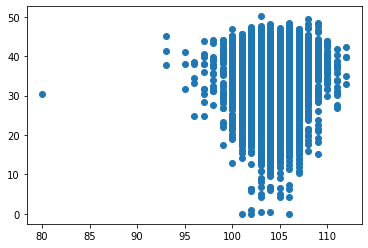

In [45]:
fig, ax = plt.subplots()
ax.scatter(clf['Dureza'], clf['Costo_Total'])
plt.show()

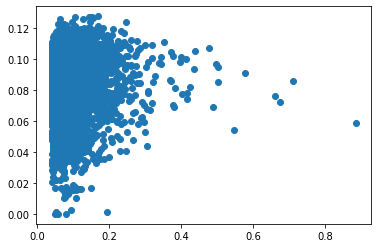

In [46]:
fig, ax = plt.subplots() 
ax.scatter(clf['Calidad'], clf['Costo_Ponderado']) 
plt.show() 

# Nuevas Variables Categóricas

In [47]:
#Crear columna total 
import copy 
new_clf = copy.deepcopy(clf) 
new_df = copy.deepcopy(clf) 

In [49]:
new_clf.loc[clf.Calidad < 0.1,'Calidad_Categorica']='Aceptable' 
new_clf.loc[(clf.Calidad > .1) & (clf.Calidad < .12),'Calidad_Categorica'] = 'Regular'  
new_clf.loc[(clf.Calidad > .12) & (clf.Calidad < 0.15),'Calidad_Categorica'] = 'Bueno'  
new_clf.loc[clf.Calidad > 0.15,'Calidad_Categorica']='Excelente' 
new_clf['Calidad_Categorica']=new_clf['Calidad_Categorica'].fillna('Regular')  
del(new_clf['Calidad'])  
new_clf

,Dureza,Tasa_Prod,Asp,EC,EE,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado,Calidad_Categorica
TIME,,,,,,,,,,
01/01/1995 0:00,100.0,368,2.78,15.1,29.7,40.6324,0.110414,0.080707,0.041033,Aceptable
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,19.4756,0.045717,0.000000,0.063146,Regular
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,21.3580,0.047888,0.000000,0.066143,Aceptable
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,39.0836,0.098946,0.064304,0.047848,Aceptable
05/01/1995 0:00,102.0,380,3.00,17.5,26.6,39.2700,0.103342,0.070000,0.046053,Aceptable
...,...,...,...,...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,25.7520,0.062963,0.022249,0.056235,Regular
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,37.0356,0.089675,0.060048,0.040920,Regular
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,29.6108,0.072575,0.034069,0.053186,Aceptable


In [50]:
clf.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado
count,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000,8057.000000
mean,104.106243,400.245377,3.204921,19.790791,19.555405,0.093814,33.883938,0.084894,0.049156,0.049362
std,2.057365,17.016625,0.285065,6.433309,7.746881,0.045528,6.872697,0.017977,0.019904,0.015694
min,80.000000,363.000000,1.110000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,389.000000,3.140000,16.400000,14.900000,0.066000,30.156800,0.074167,0.036675,0.041397
50%,104.000000,400.000000,3.270000,19.400000,20.300000,0.085000,34.618000,0.086383,0.051000,0.048628
75%,105.000000,410.000000,3.390000,23.800000,25.500000,0.109000,38.828800,0.098497,0.064573,0.059326
max,112.000000,480.000000,3.520000,40.400000,34.500000,0.887000,50.138000,0.127841,0.093407,0.102290


In [51]:
Q1_CostPond = new_clf['Costo_Ponderado'].quantile(0.25) 
Q3_CostPond = new_clf['Costo_Ponderado'].quantile(0.8)  
IQR_CostPond = Q3_CostPond - Q1_CostPond 
 
new_clf = new_clf[~(new_clf['Costo_Ponderado'] > (Q3_CostPond))]
new_clf

,Dureza,Tasa_Prod,Asp,EC,EE,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado,Calidad_Categorica
TIME,,,,,,,,,,
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,19.4756,0.045717,0.000000,0.063146,Regular
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,21.3580,0.047888,0.000000,0.066143,Aceptable
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,39.0836,0.098946,0.064304,0.047848,Aceptable
06/01/1995 0:00,105.0,393,2.95,26.1,0.0,18.8964,0.048082,0.000000,0.066412,Bueno
07/01/1995 0:00,108.0,400,2.95,27.7,0.0,20.0548,0.050137,0.000000,0.069250,Excelente
...,...,...,...,...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,25.7520,0.062963,0.022249,0.056235,Regular
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,37.0356,0.089675,0.060048,0.040920,Regular
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,29.6108,0.072575,0.034069,0.053186,Aceptable


In [52]:
new_clf.describe()

,Dureza,Tasa_Prod,Asp,EC,EE,Costo_Total,Costo_Ponderado,EE_Ponderado,EC_Ponderado
count,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000,6445.000000
mean,104.129868,402.125058,3.203054,19.880838,17.426408,31.820135,0.079285,0.043575,0.049322
std,1.986074,17.528664,0.287852,6.927491,7.048908,6.060261,0.015520,0.017970,0.016811
min,80.000000,363.000000,1.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103.000000,390.000000,3.140000,16.000000,13.300000,28.968800,0.071094,0.033014,0.040399
50%,104.000000,401.000000,3.270000,19.800000,18.600000,32.890800,0.081610,0.046469,0.049246
75%,105.000000,413.000000,3.380000,24.400000,22.500000,36.280400,0.091408,0.056757,0.060714
max,112.000000,480.000000,3.520000,40.400000,32.700000,42.835600,0.100910,0.083784,0.102290


In [53]:
del(new_clf['Costo_Ponderado'])
del(new_clf['Costo_Total'])
del(new_clf['EE_Ponderado'])
del(new_clf['EC_Ponderado'])


In [54]:
new_clf

,Dureza,Tasa_Prod,Asp,EC,EE,Calidad_Categorica
TIME,,,,,,
02/01/1995 0:00,100.0,426,3.00,26.9,0.0,Regular
03/01/1995 0:00,101.0,446,3.00,29.5,0.0,Aceptable
04/01/1995 0:00,99.0,395,3.00,18.9,25.4,Aceptable
06/01/1995 0:00,105.0,393,2.95,26.1,0.0,Bueno
07/01/1995 0:00,108.0,400,2.95,27.7,0.0,Excelente
...,...,...,...,...,...,...
12/09/2020 0:00,103.0,409,3.52,23.0,9.1,Regular
13/09/2020 0:00,104.0,413,3.52,16.9,24.8,Regular
14/09/2020 0:00,101.0,408,3.52,21.7,13.9,Aceptable


# Modelos de clasificación

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 

In [56]:
X = new_clf.drop('Calidad_Categorica', axis=1) # Features
y = new_clf.Calidad_Categorica # Target variable 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 

In [58]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=1) 

In [59]:
train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

# train is now 60% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 20% of the initial data set
# validation is now 20% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train, x_val, x_test)

                 Dureza  Tasa_Prod   Asp    EC    EE
TIME                                                
15/11/2009 0:00   105.0        427  3.40  22.4  13.6
03/11/2001 0:00   104.0        415  3.24  15.4  17.1
22/05/2004 0:00   105.0        410  3.36  16.3   9.0
11/07/2006 0:00   105.0        415  2.65  11.9  18.8
06/04/1999 0:00   107.0        419  3.52  29.0  16.1
...                 ...        ...   ...   ...   ...
28/07/2018 0:00   105.0        403  3.52  21.9  17.4
31/10/2004 0:00   102.0        402  3.17  16.1  27.7
03/08/2017 0:00   102.0        400  3.40  24.0  19.8
19/02/2015 0:00   107.0        403  3.32  17.7  26.4
18/02/1998 0:00   106.0        393  3.49  30.3  11.1

[3867 rows x 5 columns]                  Dureza  Tasa_Prod   Asp    EC    EE
TIME                                                
17/08/2008 0:00   104.0        417  2.77  15.1  16.6
30/05/2000 0:00   103.0        384  2.74  25.5  19.8
21/01/2013 0:00   103.0        366  3.06  29.7   0.4
22/08/2010 0:00   105

In [60]:
models = []

models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression(max_iter = 300000))) 
models.append(('DT', DecisionTreeClassifier(max_depth=5)))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier())) 

In [61]:
names = [] 
scores = [] 
fits = [] 
preds = [] 
 
for name, model in models:  
    fits.append(model.fit(x_train, y_train))  
    y_pred = model.predict(x_test) 
    preds.append(y_pred)  
    scores.append(accuracy_score(y_test, y_pred))  
    names.append(name)  
tr_split = pd.DataFrame({'Name': names, 'Score': scores})  
print(tr_split)  

  Name     Score
0  SVC  0.675718
1   LR  0.675718
2   DT  0.670287
3   RF  0.658650
4  XGB  0.673390


In [62]:
#fits

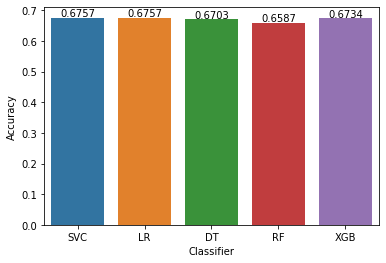

In [63]:
axis = sn.barplot(x = 'Name', y = 'Score', data = tr_split)  
axis.set(xlabel='Classifier', ylabel='Accuracy')  
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Cross-validation

In [64]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats = 3, random_state=1)

In [65]:
from numpy import mean
from numpy import std
for name, model in models:
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  print(name)
  print('Accuracy: %.3f (Std: %.3f)' % (mean(scores), std(scores)))

SVC
Accuracy: 0.674 (Std: 0.016)
LR
Accuracy: 0.674 (Std: 0.016)
DT
Accuracy: 0.672 (Std: 0.016)
RF
Accuracy: 0.663 (Std: 0.014)
XGB
Accuracy: 0.676 (Std: 0.016)


# Optimización de Hiperparámetros

## Log Reg

In [66]:
from sklearn.linear_model import LogisticRegression    

In [67]:
from sklearn.model_selection import GridSearchCV   

dual=[True,False]    
max_iter=[100,150,200,250,300]     
C = [1.0,1.5,2.0,2.5]     
param_grid = dict(dual=dual,max_iter=max_iter,C=C)   

In [68]:
import time

lr = LogisticRegression(penalty='l2')
lr_grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
lr_grid_result = lr_grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.674476 using {'C': 1.0, 'dual': False, 'max_iter': 100}
Execution time: 20.647497177124023 ms


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [69]:
#fit it to the train data 
lr_grid_result.fit(x_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 2.0, 2.5], 'dual': [True, False],
                         'max_iter': [100, 150, 200, 250, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [70]:
# Summarize results
print("Best: %f using %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.676235 using {'C': 1.0, 'dual': False, 'max_iter': 100}
Execution time: 34.974241733551025 ms


In [71]:
#import confusion_matrix 
from sklearn.metrics import confusion_matrix  
#import classification_report 
from sklearn.metrics import classification_report  

In [72]:
print(lr_grid_result.score(x_train, y_train)) 
y_pred_lr = lr_grid_result.predict(x_test)  
confusion_matrix(y_test, y_pred_lr)

0.6762348073441945


array([[871,   0,   0,   0],
       [135,   0,   0,   0],
       [ 82,   0,   0,   0],
       [201,   0,   0,   0]])

In [73]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

   Aceptable       0.68      1.00      0.81       871
       Bueno       0.00      0.00      0.00       135
   Excelente       0.00      0.00      0.00        82
     Regular       0.00      0.00      0.00       201

    accuracy                           0.68      1289
   macro avg       0.17      0.25      0.20      1289
weighted avg       0.46      0.68      0.54      1289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Árboles de Decisión

In [74]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 

**Hiper-parámetros**

criterion{“gini”, “entropy”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

splitter{“best”, “random”}, default=”best”
The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:

If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

Changed in version 0.18: Added float values for fractions.

min_samples_leafint or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

In [75]:
#Parámetros y distribuciones para 'param_dist'
param_dist = { "max_depth" : [3, 5, None],
               "max_features" : [1,2,3,4,5],
               "min_samples_leaf" : [2,3,4,5],
               "criterion" : ["gini", "entropy"]}

param_grid = { "max_depth" : [3, 5, None],
               "max_features" : [1,2,3,4,5],
               "min_samples_leaf" : [1,2,3,4,5,6,7,8,9,10],
               "criterion" : ["gini", "entropy"]}

tree = DecisionTreeClassifier()
#tree_cv = RandomizedSearchCV(tree , param_dist, cv = 5)
tree_cv = GridSearchCV(estimator = tree , param_grid = param_grid, cv = 5)

In [76]:
import time

tree_cv_res = tree_cv.fit(X, y)

# Summarize results
print("Best: %f using %s" % (tree_cv_res.best_score_, tree_cv_res.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.674631 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 10}
Execution time: 61.291322231292725 ms


In [77]:
#fit it to the train data 
tree_cv_result = tree_cv.fit(x_train, y_train) 

In [78]:
visualizar_arbol = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best')
visualizar_arbol.fit(x_train, y_train) 
visualizar_arbol

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
# Summarize results
print("Best: %f using %s" % (tree_cv_result.best_score_, tree_cv_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.678046 using {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 4}
Execution time: 79.27819061279297 ms


In [80]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#import classification_report
from sklearn.metrics import classification_report

In [81]:
print(tree_cv_result.score(x_train, y_train))
y_pred_tree = tree_cv_result.predict(x_test) 
confusion_matrix(y_test, y_pred_tree)

0.6762348073441945


array([[871,   0,   0,   0],
       [135,   0,   0,   0],
       [ 82,   0,   0,   0],
       [201,   0,   0,   0]])

In [82]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

   Aceptable       0.68      1.00      0.81       871
       Bueno       0.00      0.00      0.00       135
   Excelente       0.00      0.00      0.00        82
     Regular       0.00      0.00      0.00       201

    accuracy                           0.68      1289
   macro avg       0.17      0.25      0.20      1289
weighted avg       0.46      0.68      0.54      1289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Random Forest

In [83]:
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 

**Hiper-parámetros**

n_estimatorsint, default=100
The number of trees in the forest.

Changed in version 0.22: The default value of n_estimators changed from 10 to 100 in 0.22.

criterion{“gini”, “entropy”}, default=”gini”
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

max_depthint, default=None
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_splitint or float, default=2
The minimum number of samples required to split an internal node:

In [84]:
#Parámetros y distribuciones para 'param_dist'

param_grid = { "n_estimators" : [10,50,100],
               "max_features" : ["auto", "sqrt", "log2"],
               "max_depth" : [3,4,5,6,7,8],
               "criterion" : ["gini", "entropy"]}

rfc = RandomForestClassifier(random_state=29)
#tree_cv = RandomizedSearchCV(tree , param_dist, cv = 5)
rfc_gscv = GridSearchCV(estimator = rfc , param_grid = param_grid, cv = 5)

In [85]:
rfc_gscv_result = rfc_gscv.fit(X, y)

# Summarize results
print("Best: %f using %s" % (rfc_gscv_result.best_score_, rfc_gscv_result.best_params_))

Best: 0.674476 using {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 10}


In [86]:
#fit it to the train data
rfc_gscv_result.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=29,
                                  

In [87]:
# Summarize results
print("Best: %f using %s" % (rfc_gscv_result.best_score_, rfc_gscv_result.best_params_))

Best: 0.677787 using {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 50}


In [88]:
#import confusion_matrix 
from sklearn.metrics import confusion_matrix 
#import classification_report 
from sklearn.metrics import classification_report

In [89]:
print(rfc_gscv_result.score(x_train, y_train))
y_pred_rfc = rfc_gscv_result.predict(x_test) 
confusion_matrix(y_test, y_pred_rfc)

0.6860615464184122


array([[867,   0,   0,   4],
       [132,   0,   0,   3],
       [ 80,   0,   2,   0],
       [200,   0,   0,   1]])

In [90]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

   Aceptable       0.68      1.00      0.81       871
       Bueno       0.00      0.00      0.00       135
   Excelente       1.00      0.02      0.05        82
     Regular       0.12      0.00      0.01       201

    accuracy                           0.67      1289
   macro avg       0.45      0.26      0.22      1289
weighted avg       0.54      0.67      0.55      1289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Support Vector Classifier

In [91]:
from scipy.stats import randint
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV 

**Hiper-parámetros**

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.



In [92]:
#Parámetros y distribuciones para 'param_dist'

param_grid = { "kernel" : ["linear", "rbf", "sigmoid"],
               "C" : (0.5, 1, 1.5), 
              "gamma" : ["scale", "auto"]}

svc = SVC(random_state=29)
#tree_cv = RandomizedSearchCV(tree , param_dist, cv = 5)
svc_gscv = GridSearchCV(estimator = svc , param_grid = param_grid, cv = 5)

In [93]:

svc_gscv_res = svc_gscv.fit(X, y)

# Summarize results
print("Best: %f using %s" % (svc_gscv_res.best_score_, svc_gscv_res.best_params_))

Best: 0.674476 using {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


In [94]:
#fit it to the train data 
svc_gscv_result = svc_gscv.fit(x_train, y_train) 

In [95]:
# Summarize results
print("Best: %f using %s" % (svc_gscv_result.best_score_, svc_gscv_result.best_params_))

Best: 0.676235 using {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'}


In [96]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#import classification_report
from sklearn.metrics import classification_report

In [97]:
print(svc_gscv_result.score(x_train, y_train))
y_pred_SVC = svc_gscv_result.predict(x_test) 
confusion_matrix(y_test, y_pred_SVC)

0.6762348073441945


array([[871,   0,   0,   0],
       [135,   0,   0,   0],
       [ 82,   0,   0,   0],
       [201,   0,   0,   0]])

In [98]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

   Aceptable       0.68      1.00      0.81       871
       Bueno       0.00      0.00      0.00       135
   Excelente       0.00      0.00      0.00        82
     Regular       0.00      0.00      0.00       201

    accuracy                           0.68      1289
   macro avg       0.17      0.25      0.20      1289
weighted avg       0.46      0.68      0.54      1289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Todos Modelos

In [99]:
models = []

models.append(('SVC', svc_gscv_result))
models.append(('LR', lr_grid_result)) 
models.append(('DT', tree_cv_result))
models.append(('RF', rfc_gscv_result)) 

In [100]:
new_clf.to_csv('prueba.csv')

In [101]:
names = []
scores = []
fits = []
preds = []

for name, model in models:
    #fits.append(model.fit(x_train, y_train))
    y_pred = model.predict(x_test)
    preds.append(y_pred)
    #scores.append(model.best_score_) 
    scores.append(model.score(x_train, y_train))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  SVC  0.676235
1   LR  0.676235
2   DT  0.676235
3   RF  0.686062


In [102]:
#fits

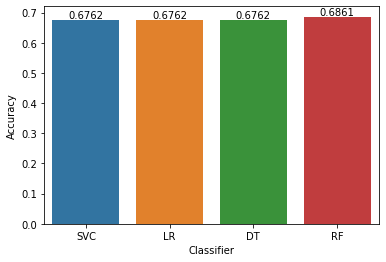

In [103]:
axis = sn.barplot(x = 'Name', y = 'Score', data = tr_split)  
axis.set(xlabel='Classifier', ylabel='Accuracy')  
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

## Classification Report - Métricas

In [104]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred)) 

[[867   0   0   4]
 [132   0   0   3]
 [ 80   0   2   0]
 [200   0   0   1]]
              precision    recall  f1-score   support

   Aceptable       0.68      1.00      0.81       871
       Bueno       0.00      0.00      0.00       135
   Excelente       1.00      0.02      0.05        82
     Regular       0.12      0.00      0.01       201

    accuracy                           0.67      1289
   macro avg       0.45      0.26      0.22      1289
weighted avg       0.54      0.67      0.55      1289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [105]:
from sklearn.metrics import classification_report, confusion_matrix   
print(confusion_matrix(y_test,preds[0]))   
print(classification_report(y_test,preds[0]))   

[[871   0   0   0]
 [135   0   0   0]
 [ 82   0   0   0]
 [201   0   0   0]]
              precision    recall  f1-score   support

   Aceptable       0.68      1.00      0.81       871
       Bueno       0.00      0.00      0.00       135
   Excelente       0.00      0.00      0.00        82
     Regular       0.00      0.00      0.00       201

    accuracy                           0.68      1289
   macro avg       0.17      0.25      0.20      1289
weighted avg       0.46      0.68      0.54      1289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [106]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds[1]))  
print(classification_report(y_test,preds[1])) 

[[871   0   0   0]
 [135   0   0   0]
 [ 82   0   0   0]
 [201   0   0   0]]
              precision    recall  f1-score   support

   Aceptable       0.68      1.00      0.81       871
       Bueno       0.00      0.00      0.00       135
   Excelente       0.00      0.00      0.00        82
     Regular       0.00      0.00      0.00       201

    accuracy                           0.68      1289
   macro avg       0.17      0.25      0.20      1289
weighted avg       0.46      0.68      0.54      1289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [107]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds[2]))  
print(classification_report(y_test,preds[2])) 

[[871   0   0   0]
 [135   0   0   0]
 [ 82   0   0   0]
 [201   0   0   0]]
              precision    recall  f1-score   support

   Aceptable       0.68      1.00      0.81       871
       Bueno       0.00      0.00      0.00       135
   Excelente       0.00      0.00      0.00        82
     Regular       0.00      0.00      0.00       201

    accuracy                           0.68      1289
   macro avg       0.17      0.25      0.20      1289
weighted avg       0.46      0.68      0.54      1289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [108]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds[3]))  
print(classification_report(y_test,preds[3])) 

[[867   0   0   4]
 [132   0   0   3]
 [ 80   0   2   0]
 [200   0   0   1]]
              precision    recall  f1-score   support

   Aceptable       0.68      1.00      0.81       871
       Bueno       0.00      0.00      0.00       135
   Excelente       1.00      0.02      0.05        82
     Regular       0.12      0.00      0.01       201

    accuracy                           0.67      1289
   macro avg       0.45      0.26      0.22      1289
weighted avg       0.54      0.67      0.55      1289



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Predicciones Calidad

In [109]:
y_predVal = rfc_gscv_result.predict(x_val)
y_predVal

array(['Aceptable', 'Aceptable', 'Aceptable', ..., 'Aceptable',
       'Aceptable', 'Aceptable'], dtype=object)

# Calculo Costos con set de validación

In [110]:
#Crear columna total    
import copy   
new_X_val = copy.deepcopy(x_val)   

In [111]:
new_X_val['Costo'] = x_val['EE'] + (0.724*x_val['EC'])  
new_X_val['Calidad'] = y_predVal 

In [112]:
new_X_val

,Dureza,Tasa_Prod,Asp,EC,EE,Costo,Calidad
TIME,,,,,,,
17/08/2008 0:00,104.0,417,2.77,15.1,16.6,27.5324,Aceptable
30/05/2000 0:00,103.0,384,2.74,25.5,19.8,38.2620,Aceptable
21/01/2013 0:00,103.0,366,3.06,29.7,0.4,21.9028,Aceptable
22/08/2010 0:00,105.0,402,2.37,19.5,20.6,34.7180,Aceptable
25/02/2012 0:00,105.0,401,3.25,18.5,19.9,33.2940,Aceptable
...,...,...,...,...,...,...,...
19/12/1998 0:00,108.0,392,3.52,27.5,15.6,35.5100,Aceptable
01/12/2015 0:00,106.0,380,3.22,20.4,9.1,23.8696,Aceptable
02/09/2009 0:00,106.0,398,3.32,16.8,12.9,25.0632,Aceptable


In [113]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [114]:
import plotly.graph_objects as go
import plotly.express as px 

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['Dureza'],
    mode='markers',
    marker= dict( 
        size=5, 
        sizemode='diameter', 
        sizeref=1500,
        color = new_X_val['Costo'],
        #color_continuous_scale='Inferno'
        colorscale = [[0, 'lime'], [0.5, 'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Dureza',  
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Dureza del Soporte'),),) 



In [115]:
figT.write_html("images/Dureza.html") 

In [116]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['Tasa_Prod'],
    mode='markers',
    marker= dict( 
        size=5, 
        sizemode='diameter', 
        sizeref=1500,
        color = new_X_val['Costo'],
        #color_continuous_scale='Inferno'
        colorscale = [[0, 'lime'], [0.5, 'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Tasa de Producción',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Tasa de producción'),),)


In [117]:
figT.write_html("images/Tasa_Prod.html")

In [118]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['Asp'],
    mode='markers',
    marker=dict(
        size=5,
        sizemode='diameter',
        sizeref=1500,
        color = new_X_val['Costo'],
        colorscale =[[0,'lime'],[0.5,'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Aspiración',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Aspiración'),),)

In [119]:
figT.write_html("images/Aspiracion.html")

In [120]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['EC'],
    mode='markers',
    marker=dict(
        size=5,
        sizemode='diameter',
        sizeref=1500,
        color = new_X_val['Costo'],
        colorscale =[[0,'lime'],[0.5,'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Energía Calórica',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Energía Calórica'),),)

In [121]:
figT.write_html("images/EC.html")

In [122]:
import plotly.graph_objects as go
import plotly.express as px

figT = go.Figure(data=go.Scatter3d(
    x=new_X_val['Calidad'],
    y=new_X_val['Costo'],
    z=new_X_val['EE'],
    mode='markers',
    marker=dict(
        size=5,
        sizemode='diameter',
        sizeref=1500,
        color = new_X_val['Costo'],
        colorscale =[[0,'lime'],[0.5,'red']],
        line_color='rgb(140, 140, 170)')))

figT.select_xaxes(['Aceptable','Regular','Bueno','Excelente'])

figT.update_layout(height=800, width=800,
                  title='Calidad y Costo vs Energía Eléctrica',
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene = dict( xaxis = dict(title='Calidad esperada'),
                                yaxis = dict(title='Costo Calculado'),
                                zaxis = dict(title='Energía Eléctrica'),),)

In [123]:
figT.write_html("images/EE.html")